In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
from hw_kernels import SVR, RBF, Polynomial, \
    KernelizedRidgeRegression

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
import time

sine = pd.read_csv('sine.csv')
X = sine['x'].values
y = sine['y'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train = X
y_train = y
X_test = X
y_test = y

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]


In [11]:
sigmas = [0.1, 0.5, 1, 2, 5, 10]
Ms = [2, 3, 4]
lambdas = [0.0001, 0.001, 0.01, 0.1, 1]
epsilons = [0, 0.1, 0.5, 1, 2, 5, 10]

res = {}
for sigma in sigmas:
    for l in lambdas:
        fitter = KernelizedRidgeRegression(kernel=RBF(sigma=sigma), lambda_=l)
        fitter.fit(X_train, y_train)
        y_pred = fitter.predict(X_test)
        mse = np.sqrt(mean_squared_error(y_test, y_pred))
        res[f'{sigma}-{l}'] = mse


df = pd.DataFrame(res.items(), columns=['sigma-lambda', 'mse'])
# df.to_csv('sine_KRR_rbf.csv', index=False)


In [12]:
res = {}
for m in Ms:
    for l in lambdas:
        for e in epsilons:
            fitter = SVR(kernel=Polynomial(M=m), lambda_=l, epsilon=e)
            print(f'{m}-{l}-{e}')
            fitter.fit(X_train, y_train)
            y_pred = fitter.predict(X_test)
            mse = np.sqrt(mean_squared_error(y_test, y_pred))
            res[f'{m}-{l}-{e}'] = mse


df = pd.DataFrame(res.items(), columns=['M-lambda-e', 'rmse'])
print(df)
# df.to_csv('sine_SVR_polynomial.csv', index=False)

2-0.0001-0
     pcost       dcost       gap    pres   dres
 0: -1.6980e+02 -6.8490e+06  7e+06  3e-09  2e-06
 1: -6.5339e+05 -1.7402e+06  1e+06  2e-09  2e-06
 2: -1.2716e+06 -1.4575e+06  2e+05  2e-09  2e-06
 3: -1.3740e+06 -1.4040e+06  3e+04  3e-10  2e-06
 4: -1.3889e+06 -1.3945e+06  6e+03  2e-16  2e-06
 5: -1.3911e+06 -1.3929e+06  2e+03  2e-16  2e-06
 6: -1.3920e+06 -1.3923e+06  3e+02  3e-11  2e-06
 7: -1.3921e+06 -1.3922e+06  6e+01  5e-11  2e-06
 8: -1.3921e+06 -1.3921e+06  7e-01  1e-11  2e-06
 9: -1.3921e+06 -1.3921e+06  1e-02  4e-12  2e-06
10: -1.3921e+06 -1.3921e+06  2e-03  2e-11  2e-06
11: -1.3921e+06 -1.3921e+06  2e-05  3e-11  2e-06
Terminated (singular KKT matrix).
2-0.0001-0.1
     pcost       dcost       gap    pres   dres
 0:  1.5983e+05 -6.8490e+06  7e+06  8e-10  1e-06
 1: -4.8717e+05 -1.5965e+06  1e+06  1e-09  2e-06
 2: -1.1172e+06 -1.3024e+06  2e+05  9e-10  2e-06
 3: -1.2181e+06 -1.2493e+06  3e+04  9e-11  2e-06
 4: -1.2291e+06 -1.2426e+06  1e+04  7e-12  2e-06
 5: -1.2325e+

In [13]:
res = {}
for s in sigmas:
    for l in lambdas:
        for e in epsilons:
            fitter = SVR(kernel=RBF(sigma=s), lambda_=l, epsilon=e)
            print(f'{s}-{l}-{e}')
            fitter.fit(X_train, y_train)
            y_pred = fitter.predict(X_test)
            mse = np.sqrt(mean_squared_error(y_test, y_pred))
            res[f'{s}-{l}-{e}'] = mse


df = pd.DataFrame(res.items(), columns=['M-lambda', 'rmse'])
print(df)
# df.to_csv('sine_SVR_RBF.csv', index=False)

0.1-0.0001-0
     pcost       dcost       gap    pres   dres
 0: -4.1737e+01 -4.7390e+06  5e+06  5e-11  2e-12
 1: -6.5359e+01 -4.7463e+04  5e+04  1e-16  4e-13
 2: -6.5362e+01 -5.3934e+02  5e+02  5e-12  4e-13
 3: -6.5362e+01 -7.0102e+01  5e+00  9e-13  4e-13
 4: -6.5362e+01 -6.5409e+01  5e-02  5e-12  4e-13
 5: -6.5362e+01 -6.5362e+01  5e-04  4e-12  5e-13
 6: -6.5362e+01 -6.5362e+01  5e-06  1e-16  4e-13
Optimal solution found.
0.1-0.0001-0.1
     pcost       dcost       gap    pres   dres
 0:  1.5996e+05 -4.7390e+06  5e+06  2e-10  2e-12
 1:  1.4991e+05 -4.7593e+04  2e+05  5e-12  5e-13
 2:  1.5021e+03 -2.5100e+04  3e+04  7e-12  5e-13
 3:  1.1816e+01 -1.1205e+03  1e+03  3e-13  2e-14
 4: -2.2850e+01 -8.2006e+01  6e+01  4e-15  3e-16
 5: -4.5453e+01 -5.2595e+01  7e+00  3e-15  2e-16
 6: -4.7103e+01 -4.8106e+01  1e+00  7e-16  1e-16
 7: -4.7342e+01 -4.7402e+01  6e-02  2e-15  1e-16
 8: -4.7358e+01 -4.7362e+01  4e-03  2e-16  2e-16
 9: -4.7359e+01 -4.7359e+01  1e-04  3e-15  1e-16
10: -4.7359e+01 -4.

In [14]:
res = {}
for m in Ms:
    for l in lambdas:
        fitter = KernelizedRidgeRegression(kernel=Polynomial(M=m), lambda_=l)
        fitter.fit(X_train, y_train)
        y_pred = fitter.predict(X_test)
        mse = np.sqrt(mean_squared_error(y_test, y_pred))
        res[f'{m}-{l}'] = mse


df = pd.DataFrame(res.items(), columns=['M-lambda', 'rmse'])
# df.to_csv('sine_KRR_polynomial.csv', index=False)


In [50]:
svr_rbf = SVR(kernel=RBF(sigma=1), lambda_=1.5, epsilon=0.7)
svr_poly = SVR(kernel=Polynomial(M=4), lambda_=0.0001, epsilon=2)
krr_rbf = KernelizedRidgeRegression(kernel=RBF(sigma=2), lambda_=0.1)
krr_poly = KernelizedRidgeRegression(kernel=Polynomial(M=4), lambda_=0.1)

svr_rbf.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)
krr_rbf.fit(X_train, y_train)
krr_poly.fit(X_train, y_train)


y_pred_svr_rbf = svr_rbf.predict(X_test)
y_pred_svr_poly = svr_poly.predict(X_test)
y_pred_krr_rbf = krr_rbf.predict(X_test)
y_pred_krr_poly = krr_poly.predict(X_test)

     pcost       dcost       gap    pres   dres
 0: -2.7542e+01 -3.7084e+02  2e+03  3e+00  3e-16
 1:  4.2272e+01 -2.2621e+02  3e+02  1e-15  6e-16
 2:  1.4411e+01 -1.5126e+01  3e+01  4e-16  5e-16
 3:  2.9140e-01 -8.1221e+00  8e+00  4e-16  2e-16
 4: -3.5008e+00 -6.0204e+00  3e+00  2e-16  2e-16
 5: -4.6530e+00 -5.2987e+00  6e-01  3e-16  2e-16
 6: -4.9285e+00 -5.1168e+00  2e-01  3e-16  2e-16
 7: -5.0244e+00 -5.0444e+00  2e-02  1e-15  2e-16
 8: -5.0351e+00 -5.0356e+00  4e-04  2e-15  3e-16
 9: -5.0354e+00 -5.0354e+00  8e-06  6e-16  2e-16
10: -5.0354e+00 -5.0354e+00  4e-07  7e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.9991e+06 -8.5350e+06  1e+07  6e-07  8e-02
 1:  1.5773e+06 -9.5475e+05  3e+06  2e-07  1e-01
 2:  8.5377e+05 -6.5900e+05  2e+06  2e-07  6e-02
 3:  1.3368e+05 -1.0112e+05  2e+05  3e-08  3e-02
 4:  5.0045e+04 -4.1834e+04  9e+04  7e-09  2e-02
 5:  3.1480e+04 -2.8516e+04  6e+04  5e-09  1e-02
 6:  1.0509e+04 -1.1440e+04  2e+04  8e-10  5e-0

In [39]:
print("nr_support_vectors_svr_rbf", len(svr_rbf.support_vectors))
print("nr_support_vectors_svr_poly", len(svr_poly.support_vectors))

nr_support_vectors_svr_rbf 23
nr_support_vectors_svr_poly 6


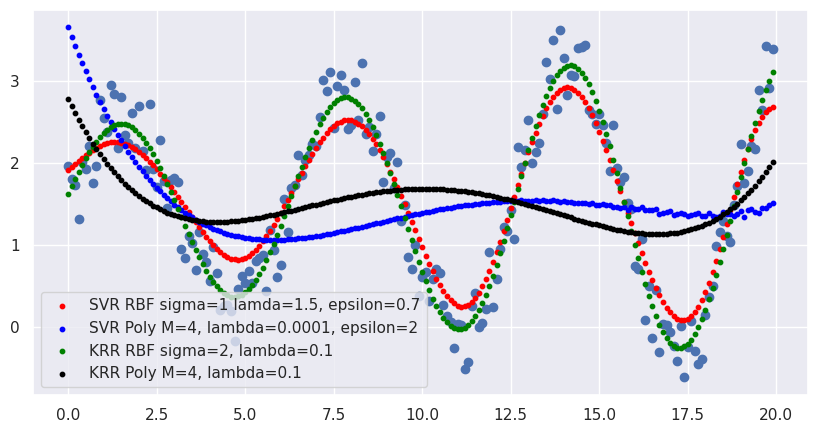

In [44]:
figure = plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_svr_rbf, label='SVR RBF sigma=1 lamda=1.5, epsilon=0.7', color='red', s=10)
plt.scatter(X_test, y_pred_svr_poly, label='SVR Poly M=4, lambda=0.0001, epsilon=2', color='blue', s=10)
plt.scatter(X_test, y_pred_krr_rbf, label='KRR RBF sigma=2, lambda=0.1', color='green', s=10)
plt.scatter(X_test, y_pred_krr_poly, label='KRR Poly M=4, lambda=0.1', color='black', s=10)
plt.legend()
plt.savefig('report/figures/sine.pdf')


In [52]:
housing2r = pd.read_csv('housing2r.csv')

X_train = housing2r.drop('y', axis=1).iloc[:160, :]

x_mean = X_train.mean()
x_std = X_train.std()
X_train = (X_train - x_mean) / x_std
X_train = X_train.values

y_train = housing2r['y'].values[:160]
X_test = housing2r.drop('y', axis=1).iloc[160:, :]
X_test = (X_test - x_mean) / x_std
X_test = X_test.values

y_test = housing2r['y'].values[160:]


In [53]:
sigmas = [0.1, 1, 2, 3, 4, 5]
Ms = [1, 2, 3, 4, 5]


mses_RBF = []
for sigma in sigmas:
    fitter = KernelizedRidgeRegression(kernel=RBF(sigma=sigma), lambda_=1)
    fitter.fit(X_train, y_train)
    y_pred = fitter.predict(X_test)
    mse1 = np.sqrt(mean_squared_error(y_test, y_pred))

    fitter = SVR(kernel=RBF(sigma=sigma), lambda_=1, epsilon=8)
    fitter.fit(X_train, y_train)
    y_pred = fitter.predict(X_test)
    mse2 = np.sqrt(mean_squared_error(y_test, y_pred))
    nr_supports = len(fitter.support_vectors)
    
    mses_RBF.append([sigma, mse1, mse2, nr_supports])

mses_poly = []
for m in Ms:
    fitter = KernelizedRidgeRegression(kernel=Polynomial(M=m), lambda_=1)
    fitter.fit(X_train, y_train)
    y_pred = fitter.predict(X_test)
    mse1 = np.sqrt(mean_squared_error(y_test, y_pred))

    fitter = SVR(kernel=Polynomial(M=m), lambda_=1, epsilon=8)
    fitter.fit(X_train, y_train)
    y_pred = fitter.predict(X_test)
    mse2 = np.sqrt(mean_squared_error(y_test, y_pred))
    nr_supports = len(fitter.support_vectors)
    mses_poly.append([m, mse1, mse2, nr_supports])


     pcost       dcost       gap    pres   dres
 0: -1.2728e+04 -3.8363e+03  8e+04  2e+01  2e-16
 1: -1.1133e+03 -2.6429e+03  9e+03  1e+00  2e-16
 2:  9.7008e+01 -1.1402e+03  1e+03  8e-16  3e-16
 3: -1.1446e+02 -3.0604e+02  2e+02  5e-15  1e-16
 4: -1.6825e+02 -2.0965e+02  4e+01  2e-15  1e-16
 5: -1.8378e+02 -1.8682e+02  3e+00  2e-16  1e-16
 6: -1.8512e+02 -1.8521e+02  9e-02  9e-16  1e-16
 7: -1.8516e+02 -1.8517e+02  3e-03  4e-16  1e-16
 8: -1.8517e+02 -1.8517e+02  6e-05  1e-15  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1902e+04 -5.8823e+03  3e+05  3e+01  6e-16
 1: -7.1215e+02 -5.3074e+03  3e+04  2e+00  1e-15
 2:  4.3706e+02 -2.9008e+03  3e+03  7e-15  2e-15
 3:  8.9302e+01 -2.9567e+02  4e+02  2e-15  3e-16
 4: -8.8950e+01 -1.6950e+02  8e+01  3e-15  2e-16
 5: -1.1620e+02 -1.4868e+02  3e+01  2e-15  2e-16
 6: -1.3099e+02 -1.3610e+02  5e+00  2e-15  2e-16
 7: -1.3317e+02 -1.3391e+02  7e-01  2e-15  2e-16
 8: -1.3353e+02 -1.3355e+02  2e-02  2e-15  2e-1

In [54]:
sigmas = [0.1, 1, 2, 3, 4, 5]
Ms = [1, 2, 3, 4, 5]

t = time.time()
params = {'lambda_': np.array([0.0001, 0.001, 0.01, 1, 2, 3, 4, 5, 10])}
mses_RBF_cv = []
for sigma in sigmas:
    
    model = GridSearchCV(KernelizedRidgeRegression(kernel=RBF(sigma=sigma)), params, cv=5, scoring='neg_mean_squared_error')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse1 = np.sqrt(mean_squared_error(y_test, y_pred))

    fitter = GridSearchCV(SVR(kernel=RBF(sigma=sigma), epsilon=8), params, cv=5, scoring='neg_mean_squared_error')
    fitter.fit(X_train, y_train)
    y_pred = fitter.predict(X_test)
    print("nr_supports: ", len(fitter.best_estimator_.support_vectors))
    nr_supports = len(fitter.best_estimator_.support_vectors)
    mse2 = np.sqrt(mean_squared_error(y_test, y_pred))
    
    mses_RBF_cv.append([sigma, mse1, mse2, nr_supports])

print(mses_RBF_cv)
mses_poly_cv = []
for m in Ms:
    fitter = GridSearchCV(KernelizedRidgeRegression(kernel=Polynomial(M=m)), params, cv=5, scoring='neg_mean_squared_error')
    fitter.fit(X_train, y_train)
    y_pred = fitter.predict(X_test)
    mse1 = np.sqrt(mean_squared_error(y_test, y_pred))
    
    fitter = GridSearchCV(SVR(kernel=Polynomial(M=m), epsilon=8), params, cv=5,scoring='neg_mean_squared_error')
    fitter.fit(X_train, y_train)
    y_pred= fitter.predict(X_test)
    nr_supports = len(fitter.best_estimator_.support_vectors)
    mse2 = np.sqrt(mean_squared_error(y_test, y_pred))
    
    mses_poly_cv.append([m, mse1, mse2, nr_supports])
print(mses_poly_cv)
print('Time elapsed CV:', int((time.time() - t)))

     pcost       dcost       gap    pres   dres
 0: -1.2442e+03 -2.1247e+04  6e+04  1e+00  2e-16
 1:  1.6353e+03 -6.5318e+03  8e+03  5e-14  2e-16
 2: -4.3697e+02 -1.2469e+03  8e+02  1e-14  1e-16
 3: -7.2384e+02 -7.8198e+02  6e+01  1e-14  1e-16
 4: -7.5022e+02 -7.5259e+02  2e+00  9e-15  1e-16
 5: -7.5131e+02 -7.5141e+02  1e-01  6e-15  1e-16
 6: -7.5135e+02 -7.5136e+02  5e-03  1e-14  1e-16
 7: -7.5135e+02 -7.5135e+02  6e-04  2e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3264e+03 -2.1603e+04  6e+04  1e+00  1e-16
 1:  1.6495e+03 -6.7876e+03  8e+03  4e-14  3e-16
 2: -4.6626e+02 -1.3014e+03  8e+02  4e-14  2e-16
 3: -7.5802e+02 -8.2768e+02  7e+01  1e-14  1e-16
 4: -7.8733e+02 -7.9009e+02  3e+00  3e-15  1e-16
 5: -7.8849e+02 -7.8861e+02  1e-01  5e-15  1e-16
 6: -7.8854e+02 -7.8854e+02  7e-03  1e-14  1e-16
 7: -7.8854e+02 -7.8854e+02  4e-04  7e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.3854e+02 -2.1713e

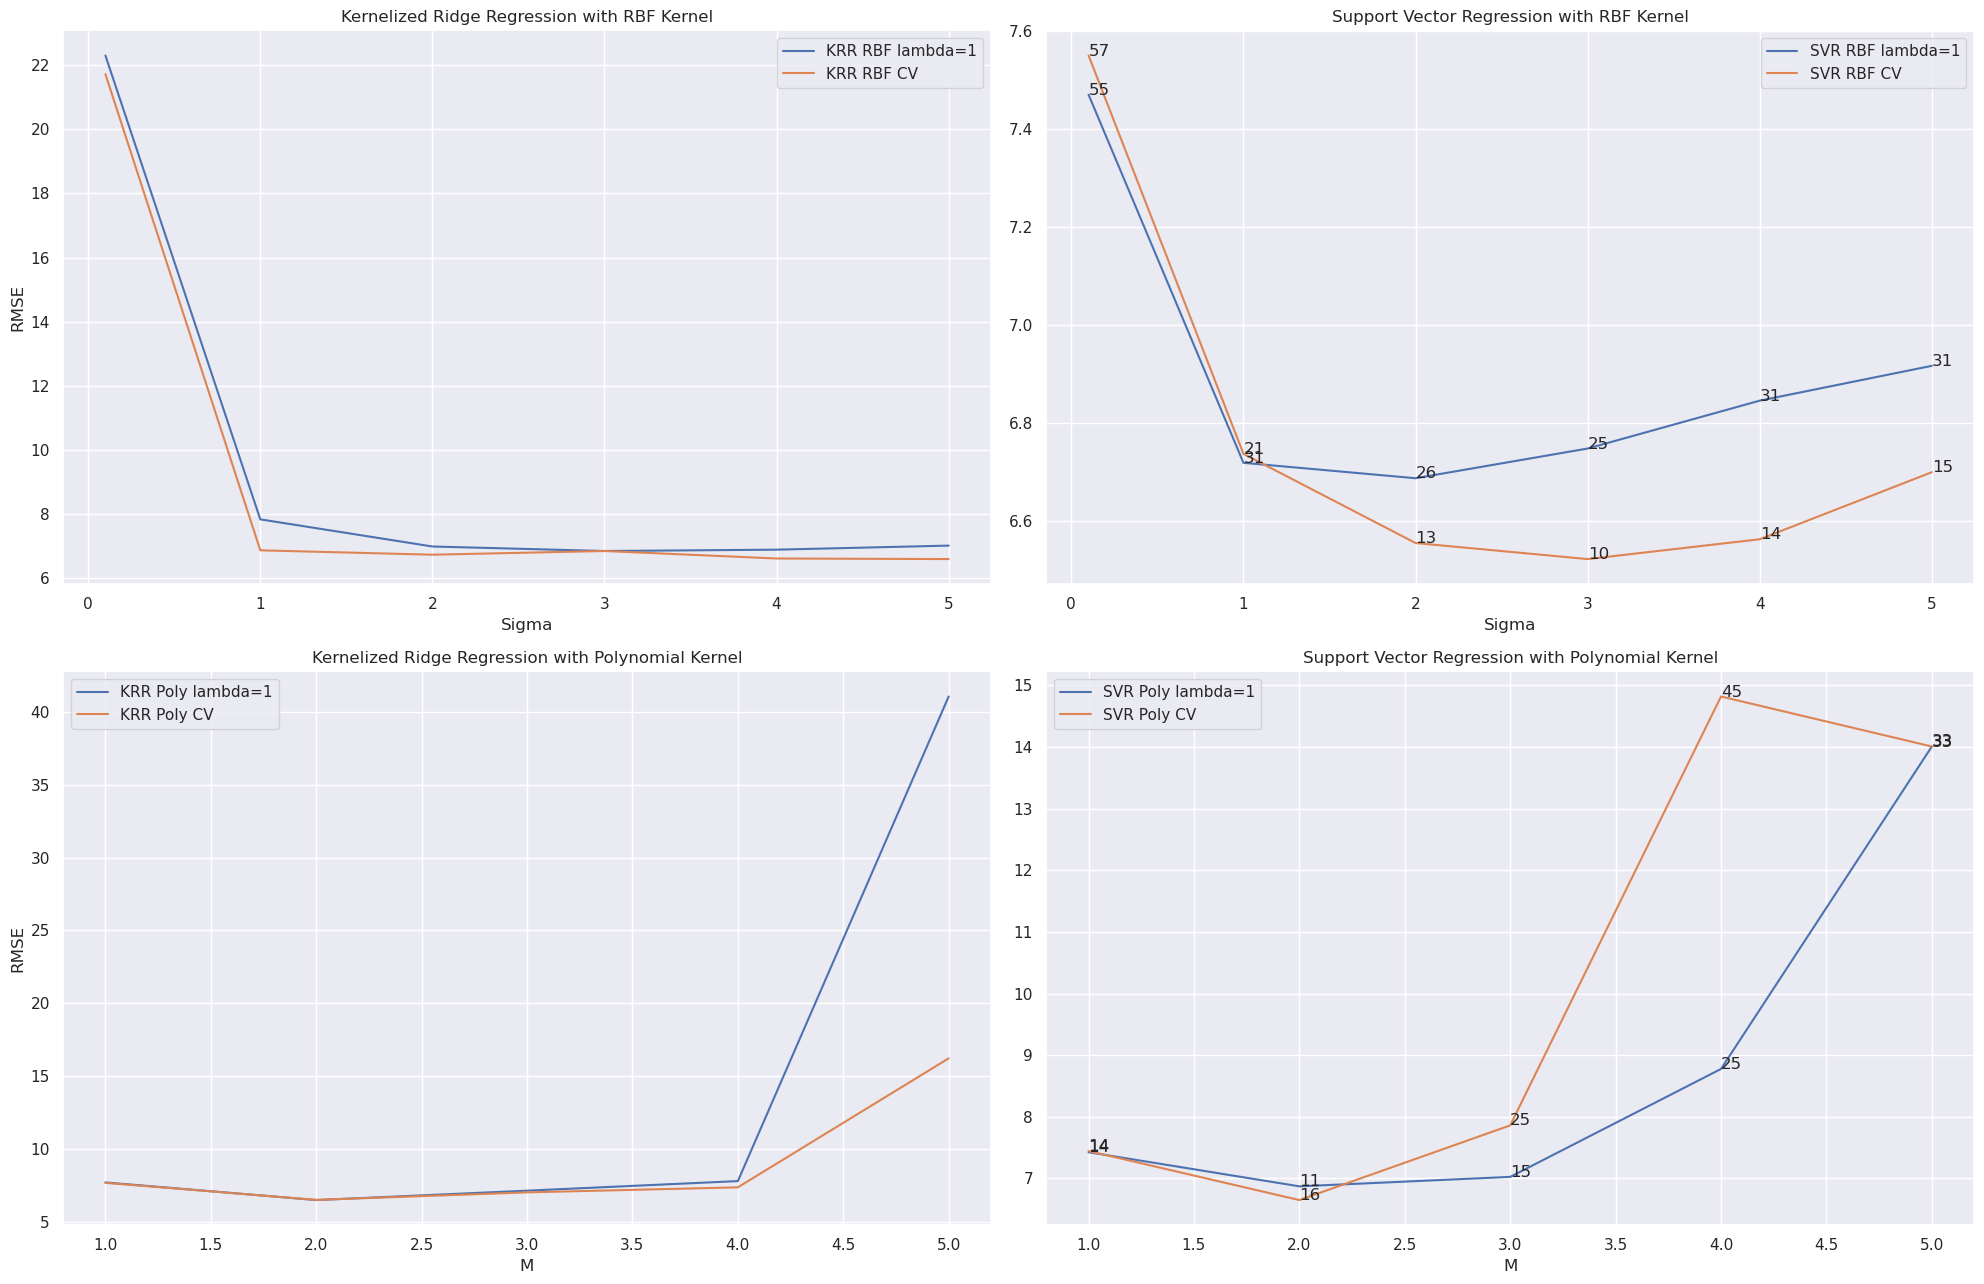

In [56]:
figure, ax = plt.subplots(2, 2, figsize=(20, 13))
ax[0, 0].plot([x[0] for x in mses_RBF], [x[1] for x in mses_RBF], label='KRR RBF lambda=1')
ax[0, 1].plot([x[0] for x in mses_RBF], [x[2] for x in mses_RBF], label='SVR RBF lambda=1')
ax[0,0].plot([x[0] for x in mses_RBF_cv], [x[1] for x in mses_RBF_cv], label='KRR RBF CV')
ax[0,1].plot([x[0] for x in mses_RBF_cv], [x[2] for x in mses_RBF_cv], label='SVR RBF CV')

ax[1, 0].plot([x[0] for x in mses_poly], [x[1] for x in mses_poly], label='KRR Poly lambda=1')
ax[1, 1].plot([x[0] for x in mses_poly], [x[2] for x in mses_poly], label='SVR Poly lambda=1')
ax[1, 0].plot([x[0] for x in mses_poly_cv], [x[1] for x in mses_poly_cv], label='KRR Poly CV')
ax[1, 1].plot([x[0] for x in mses_poly_cv], [x[2] for x in mses_poly_cv], label='SVR Poly CV')


for r in mses_RBF:
    ax[0, 1].annotate(str(r[3]), (r[0], r[2]))

for r in mses_poly:
    ax[1, 1].annotate(str(r[3]), (r[0], r[2]))

for r in mses_RBF_cv:
    ax[0, 1].annotate(str(r[3]), (r[0], r[2]))

for r in mses_poly_cv:
    ax[1, 1].annotate(str(r[3]), (r[0], r[2]))


ax[0,1].set_title('Support Vector Regression with RBF Kernel')
ax[0, 0].set_title('Kernelized Ridge Regression with RBF Kernel')
ax[1, 0].set_title('Kernelized Ridge Regression with Polynomial Kernel')
ax[1, 1].set_title('Support Vector Regression with Polynomial Kernel')

ax[0,0].set_ylabel('RMSE')
ax[1,0].set_ylabel('RMSE')
ax[0,0].set_xlabel('Sigma')
ax[0,1].set_xlabel('Sigma')
ax[1,0].set_xlabel('M')
ax[1,1].set_xlabel('M')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

plt.tight_layout()
plt.savefig('report/figures/housing_results.pdf')
